In [1]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

/home/adrian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/adrian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/adrian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/adrian/anaconda3/envs/tensor

In [2]:
def load_data(path, type):
    
    if type == "labels":
        
        labels = pd.read_csv(path + "Labels.csv")
        labels = labels.drop('id', axis=1)
        
        return labels
    
    if type == "train":
        
        all_files = sorted(glob.glob(path + "*.csv"))
        
        dataframes = []
        names = []
        
        for file in all_files:
            
            sample_data = pd.read_csv(file, header = None, names = ["X_Axis", "Y_Axis", "Z_Axis"])
        
            dataframes.append(sample_data)
            
            file_name = file[-9 : -4]
            
            names.append(file_name) 
            
        return names, dataframes 
    
    if type == "test":
        
        all_files = sorted(glob.glob(path + "*.csv"))
        
        dataframes = []
        names = []
        
        for file in all_files:
            
            sample_data = pd.read_csv(file, header = None, names = ["X_Axis", "Y_Axis", "Z_Axis"])
        
            dataframes.append(sample_data)
            
            file_name = file[-9 : -4]
            
            names.append(file_name) 
            
        return names, dataframes 
        

In [3]:
def visualize_dataframe_3d(dataframes, n = 5):
    
    %matplotlib notebook
    
    for i in range(n):
        fig = plt.figure(figsize=(5,3))
        ax = Axes3D(fig)

        xs = dataframes[i]["X_Axis"].values
        ys = dataframes[i]["Y_Axis"].values
        zs = dataframes[i]["Z_Axis"].values

        ax.scatter(xs, ys, zs)
        plt.show()

In [4]:
def visualize_dataframe_axis(dataframes, n = 5):
    
    %matplotlib inline
    
    for i in range(n):
        time = [s for s in range(150)] 

        plt.subplot(3, 1, 1)
        plt.plot(time, list(dataframes[i]["X_Axis"].values), '.-')
        plt.title('A tale of 3 subplots')
        plt.ylabel('X_Axis')

        plt.subplot(3, 1, 2)
        plt.plot(time, list(dataframes[i]["Y_Axis"].values), '.-')
        plt.xlabel('Time (s)')
        plt.ylabel('Y_Axis')

        plt.subplot(3, 1, 3)
        plt.plot(time, list(dataframes[i]["Z_Axis"].values), '.-')
        plt.xlabel('Time (s)')
        plt.ylabel('Z_Axis')

        plt.show()

In [5]:
def interpolate_data(dataframe):
    
    if len(dataframe) < 150:

        for i in range(150 - len(dataframe)):
            dataframe.loc[len(dataframe)] = [np.nan, np.nan, np.nan]

        dataframe["X_Axis"].interpolate(inplace=True)
        dataframe["Y_Axis"].interpolate(inplace=True)
        dataframe["Z_Axis"].interpolate(inplace=True)

    elif len(dataframe) > 150:
        dataframe = dataframe[: 150]
        
    return dataframe

In [6]:
def moving_average(dataframe, step = 10, jump = 1):
    
    average_dataframe = pd.DataFrame(columns = ["X_Axis", "Y_Axis", "Z_Axis"])
    for i in range(10, 140, jump):
        xs = dataframe["X_Axis"][(i - step) : (i + step)].values
        ys = dataframe["Y_Axis"][(i - step) : (i + step)].values
        zs = dataframe["Z_Axis"][(i - step) : (i + step)].values
        
        average_dataframe.loc[len(average_dataframe)] = [xs.mean(), ys.mean(), zs.mean()]
        
    return average_dataframe

In [7]:
def set_time_segments(dataframes, time_step, n_features):
    segments = np.zeros((len(dataframes), time_step, n_features))
    
    for i in range(len(dataframes)):
        segments[i] = dataframes[i].values
          
    return segments   

In [8]:
def set_labels_one_hot(labels, n_classes):
    classes = np.zeros((len(labels), n_classes))
    
    for i in range(len(labels)):
        one_hot = np.zeros(n_classes)
        
        one_hot[labels['class'][i] - 1] = 1
        
        classes[i] = one_hot
        
    return classes   

In [9]:
test_path = "/home/adrian/Desktop/Python/Personal/Competitie/Dataset/TestData/"

train_path = "/home/adrian/Desktop/Python/Personal/Competitie/Dataset/TrainData/"

labels_path = "/home/adrian/Desktop/Python/Personal/Competitie/Dataset/"

labels = load_data(labels_path, type = "labels")

train_names, raw_train_dataframes = load_data(train_path, type = "train")

test_names, raw_test_dataframes = load_data(test_path, type = "test")

In [10]:
print("Verificare Citire")

#display(labels.head(n = 20))

display(raw_train_dataframes[0].head(n = 20))

# print(train_names[:10])

# display(test_dataframes[10].head(n = 20))

# print(test_names[:10])

Verificare Citire


,X_Axis,Y_Axis,Z_Axis
0,-0.767342,4.330513,7.996035
1,-0.826000,4.371214,7.986458
2,-0.819415,4.401740,8.008605
3,-0.809240,4.446631,8.027160
4,-0.798466,4.450222,8.033744
5,-0.762553,4.480150,8.039729
6,-0.725443,4.459201,8.024766
7,-0.667384,4.477157,8.056489
8,-0.653617,4.520253,8.105570
9,-0.694318,4.498705,8.123527


<IPython.core.display.Javascript object>


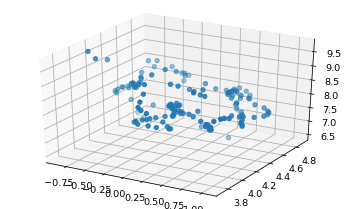

<IPython.core.display.Javascript object>


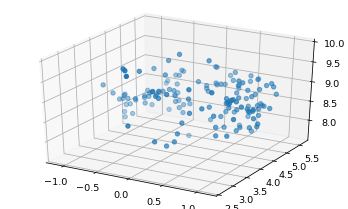

<IPython.core.display.Javascript object>


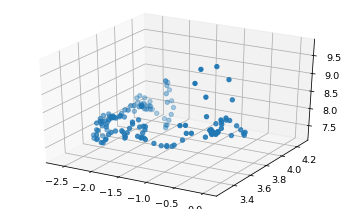

In [11]:
visualize_dataframe_3d(raw_train_dataframes, 3)

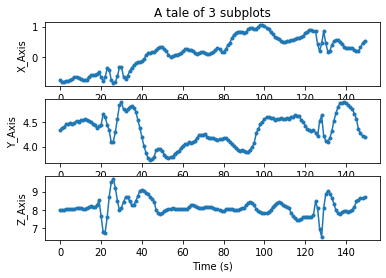

In [13]:
visualize_dataframe_axis(raw_train_dataframes, 1)

In [14]:
interpolated_dataframes = []
for i in range(len(raw_train_dataframes)):
    interpolated_dataframes.append(interpolate_data(raw_train_dataframes[i]))

<IPython.core.display.Javascript object>


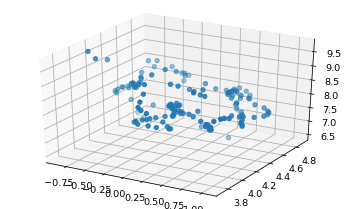

In [15]:
visualize_dataframe_3d(interpolated_dataframes, 1)

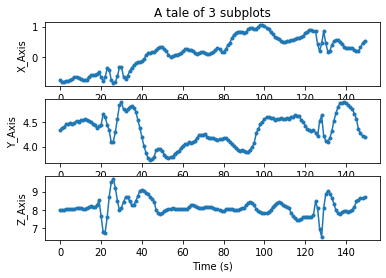

In [21]:
visualize_dataframe_axis(interpolated_dataframes, 1)

In [17]:
dataframes = []

for i in range(len(interpolated_dataframes)):
    average_dataframe = moving_average(interpolated_dataframes[i])
    dataframes.append(average_dataframe)
    

In [18]:
display(dataframes[0].head(n = 20))

,X_Axis,Y_Axis,Z_Axis
0,-0.704793,4.463211,8.106468
1,-0.699945,4.468089,8.089948
2,-0.699137,4.482215,8.030601
3,-0.691954,4.492061,7.967873
4,-0.670676,4.491642,7.945787
5,-0.652180,4.485357,7.980114
6,-0.652510,4.465515,8.053915
7,-0.660321,4.447529,8.137652
8,-0.668521,4.438191,8.194694
9,-0.668222,4.439957,8.214237


<IPython.core.display.Javascript object>


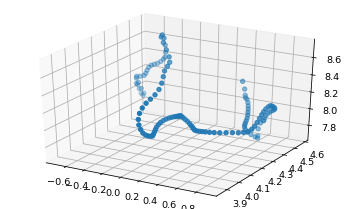

<IPython.core.display.Javascript object>


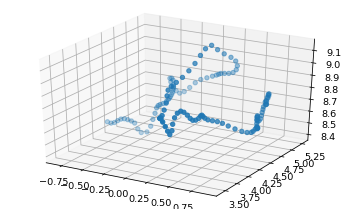

<IPython.core.display.Javascript object>


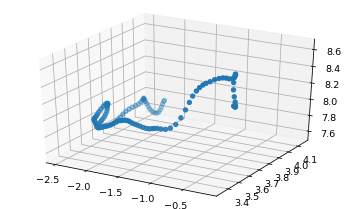

In [19]:
visualize_dataframe_3d(dataframes, 3)

In [20]:
N_TIME_STEPS = 130
N_FEATURES = 3
N_CLASSES = 20

segments = set_time_segments(dataframes, N_TIME_STEPS, N_FEATURES)

print(segments.shape)

(9000, 130, 3)


In [20]:
print(segments[10])

[[-2.98197815  4.5008596   7.467934  ]
 [-2.98251685  4.5303083   7.37144765]
 [-2.9720123   4.55188605  7.25353325]
 [-2.95453465  4.56990245  7.15947105]
 [-2.938284    4.57591785  7.09384   ]
 [-2.92748015  4.57537915  7.07310025]
 [-2.91443175  4.56741845  7.09955615]
 [-2.8954577   4.55335255  7.1789838 ]
 [-2.868074    4.539137    7.27038245]
 [-2.8380567   4.52243745  7.34029315]
 [-2.8145037   4.5072343   7.38174275]
 [-2.7915194   4.497867    7.38763845]
 [-2.76587155  4.49699915  7.36860455]
 [-2.73974485  4.50115905  7.33819815]
 [-2.7113137   4.5104067   7.30689395]
 [-2.6762686   4.51720025  7.2699933 ]
 [-2.6358365   4.51609295  7.21555515]
 [-2.5846006   4.50445115  7.16216445]
 [-2.52190245  4.4852676   7.12029585]
 [-2.44579675  4.46063725  7.0932414 ]
 [-2.3559244   4.4244549   7.1188893 ]
 [-2.26302935  4.3772891   7.1716216 ]
 [-2.1838112   4.3281481   7.26086545]
 [-2.1139903   4.26916095  7.346099  ]
 [-2.0412365   4.20987455  7.4343852 ]
 [-1.955973    4.14409385

In [21]:
display(dataframes[10].head(20))

,X_Axis,Y_Axis,Z_Axis
0,-2.981978,4.500860,7.467934
1,-2.982517,4.530308,7.371448
2,-2.972012,4.551886,7.253533
3,-2.954535,4.569902,7.159471
4,-2.938284,4.575918,7.093840
5,-2.927480,4.575379,7.073100
6,-2.914432,4.567418,7.099556
7,-2.895458,4.553353,7.178984
8,-2.868074,4.539137,7.270382
9,-2.838057,4.522437,7.340293


In [22]:
one_hot_labels = set_labels_one_hot(labels, N_CLASSES)

In [23]:
print(labels['class'][2])

6


In [24]:
print(one_hot_labels[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(segments, one_hot_labels, test_size=0.2, random_state = 42)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7200 samples.
Testing set has 1800 samples.


In [26]:
N_CLASSES = 20
N_HIDDEN_UNITS = 512
def LSTM_Model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [27]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [28]:
pred_Y = LSTM_Model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API


In [29]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred_Y, labels = Y)) + l2

In [30]:
LEARNING_RATE = 0.0001

optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [31]:
N_EPOCHS = 300
BATCH_SIZE = 1024
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    #if i != 1 and i % 10 != 0:
        #continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

epoch: 1 test accuracy: 0.1733333319425583 loss: 15.63652515411377
epoch: 2 test accuracy: 0.23444443941116333 loss: 14.421323776245117
epoch: 3 test accuracy: 0.2983333468437195 loss: 13.726728439331055
epoch: 4 test accuracy: 0.3633333444595337 loss: 13.501944541931152
epoch: 5 test accuracy: 0.38555556535720825 loss: 13.296225547790527
epoch: 6 test accuracy: 0.4183333218097687 loss: 13.171455383300781
epoch: 7 test accuracy: 0.46666666865348816 loss: 13.051224708557129
epoch: 8 test accuracy: 0.49444442987442017 loss: 12.933304786682129
epoch: 9 test accuracy: 0.5216666460037231 loss: 12.838932037353516
epoch: 10 test accuracy: 0.5616666674613953 loss: 12.714333534240723
epoch: 11 test accuracy: 0.5672222375869751 loss: 12.637142181396484
epoch: 12 test accuracy: 0.5861111283302307 loss: 12.538358688354492
epoch: 13 test accuracy: 0.6027777791023254 loss: 12.456913948059082
epoch: 14 test accuracy: 0.6105555295944214 loss: 12.374624252319336
epoch: 15 test accuracy: 0.6394444704055

epoch: 120 test accuracy: 0.7400000095367432 loss: 10.883222579956055
epoch: 121 test accuracy: 0.8061110973358154 loss: 10.709588050842285
epoch: 122 test accuracy: 0.7211111187934875 loss: 10.942625045776367
epoch: 123 test accuracy: 0.8016666769981384 loss: 10.697287559509277
epoch: 124 test accuracy: 0.8033333420753479 loss: 10.682948112487793
epoch: 125 test accuracy: 0.8027777671813965 loss: 10.67728042602539
epoch: 126 test accuracy: 0.8261111378669739 loss: 10.628499031066895
epoch: 127 test accuracy: 0.8272222280502319 loss: 10.628653526306152
epoch: 128 test accuracy: 0.8188889026641846 loss: 10.624553680419922
epoch: 129 test accuracy: 0.8222222328186035 loss: 10.61445426940918
epoch: 130 test accuracy: 0.823888897895813 loss: 10.602449417114258
epoch: 131 test accuracy: 0.8327777981758118 loss: 10.578645706176758
epoch: 132 test accuracy: 0.8372222185134888 loss: 10.555989265441895
epoch: 133 test accuracy: 0.8427777886390686 loss: 10.537635803222656
epoch: 134 test accurac

epoch: 238 test accuracy: 0.7972221970558167 loss: 9.955896377563477
epoch: 239 test accuracy: 0.7905555367469788 loss: 9.988581657409668
epoch: 240 test accuracy: 0.8422222137451172 loss: 9.809749603271484
epoch: 241 test accuracy: 0.8427777886390686 loss: 9.804311752319336
epoch: 242 test accuracy: 0.8538888692855835 loss: 9.776421546936035
epoch: 243 test accuracy: 0.8544444441795349 loss: 9.757277488708496
epoch: 244 test accuracy: 0.8650000095367432 loss: 9.737936019897461
epoch: 245 test accuracy: 0.870555579662323 loss: 9.721394538879395
epoch: 246 test accuracy: 0.8638888597488403 loss: 9.719947814941406
epoch: 247 test accuracy: 0.8583333492279053 loss: 9.717080116271973
epoch: 248 test accuracy: 0.8594444394111633 loss: 9.70001220703125
epoch: 249 test accuracy: 0.8688889145851135 loss: 9.683728218078613
epoch: 250 test accuracy: 0.875 loss: 9.672136306762695
epoch: 251 test accuracy: 0.8761110901832581 loss: 9.664359092712402
epoch: 252 test accuracy: 0.875 loss: 9.659117698

In [32]:
pickle.dump(predictions, open("predictions.p", "wb"))
pickle.dump(history, open("history.p", "wb"))
#sess.close()

In [33]:
history = pickle.load(open("history.p", "rb"))
predictions = pickle.load(open("predictions.p", "rb"))

<IPython.core.display.Javascript object>


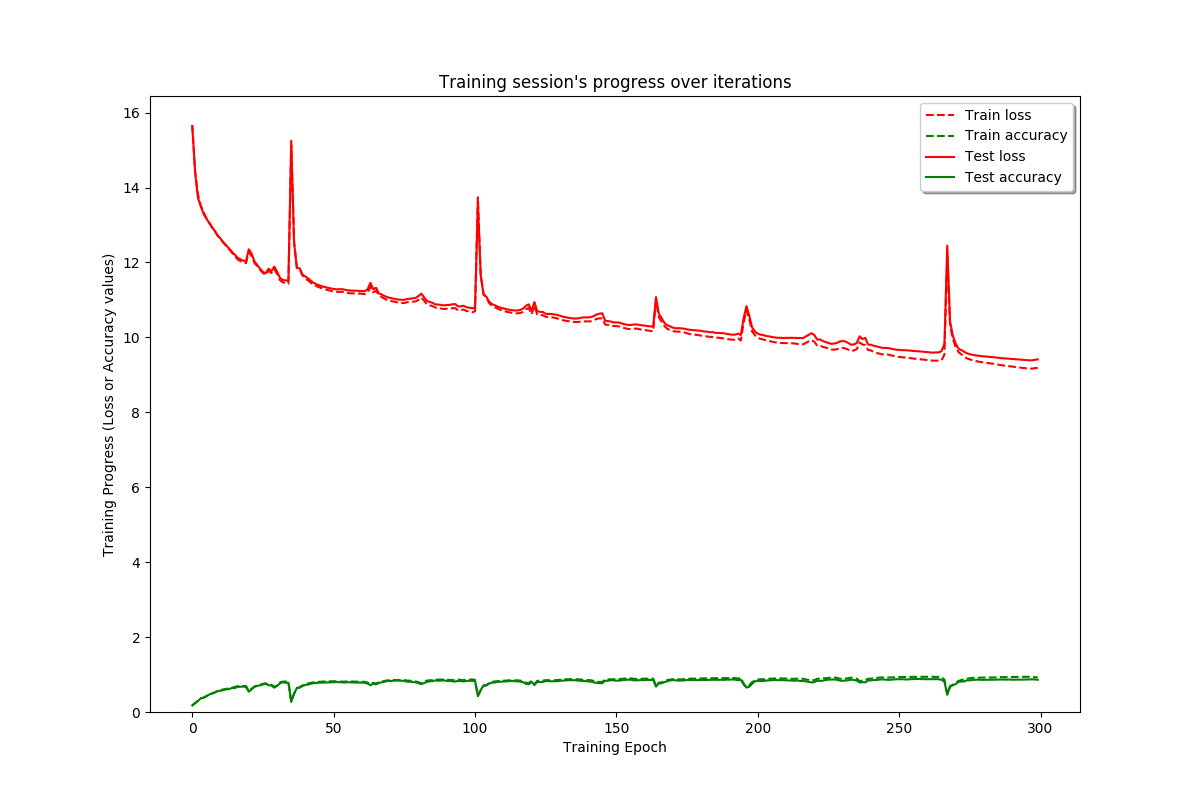

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")
plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()

<IPython.core.display.Javascript object>


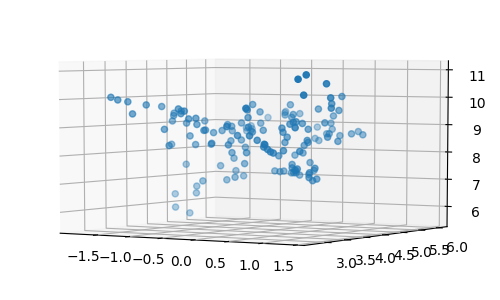

<IPython.core.display.Javascript object>


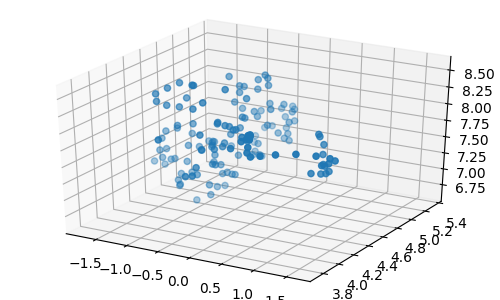

<IPython.core.display.Javascript object>


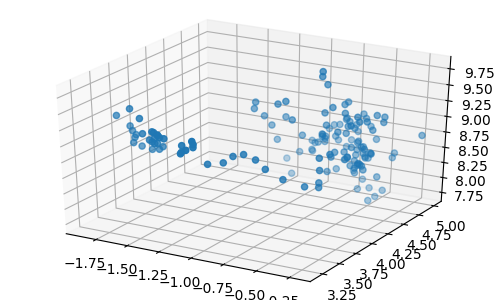

In [35]:
visualize_dataframe_3d(raw_test_dataframes, 3)

In [36]:
interpolated_dataframes_test = []
for i in range(len(raw_test_dataframes)):
    interpolated_dataframes_test.append(interpolate_data(raw_test_dataframes[i]))

In [37]:
print(interpolated_dataframes_test[0].values)

[[-3.2022400e-01  4.9661730e+00  7.3077020e+00]
 [-2.2864600e-01  4.9476180e+00  7.2897460e+00]
 [-1.5682000e-01  4.9290630e+00  7.3202710e+00]
 [-8.7388000e-02  5.0104660e+00  7.2496430e+00]
 [-3.2322000e-02  5.0038820e+00  7.3496010e+00]
 [ 4.9680000e-02  4.8386820e+00  7.2873520e+00]
 [ 1.0534500e-01  4.7985790e+00  7.3819220e+00]
 [ 8.2001000e-02  4.7411180e+00  7.6009920e+00]
 [-3.7110000e-02  4.5950720e+00  7.9218150e+00]
 [ 1.0235200e-01  4.5202530e+00  8.4186120e+00]
 [ 2.0650000e-01  4.4017400e+00  8.6251120e+00]
 [ 2.0290900e-01  4.3005850e+00  8.8106620e+00]
 [ 2.0949300e-01  4.2628760e+00  8.9620950e+00]
 [ 2.7832600e-01  4.3508630e+00  9.0985650e+00]
 [ 2.8850100e-01  4.4214920e+00  9.1620110e+00]
 [ 3.0825300e-01  4.4615950e+00  9.1775730e+00]
 [ 3.4596200e-01  4.5585600e+00  9.1117330e+00]
 [ 3.8247400e-01  4.6489410e+00  8.8974520e+00]
 [ 6.0333900e-01  4.7776290e+00  8.6149360e+00]
 [ 6.4703300e-01  4.9757500e+00  8.4491380e+00]
 [ 6.5122300e-01  4.9931080e+00  9.56064

In [ ]:
dataframes_test = []

for i in range(len(interpolated_dataframes_test)):
    average_dataframe_test = moving_average(interpolated_dataframes_test[i])
    dataframes_test.append(average_dataframe_test)

In [ ]:
print(dataframes_test[0].values)

In [ ]:
visualize_dataframe_3d(dataframes_test, 3)

In [ ]:
N_TIME_STEPS = 130
N_FEATURES = 3
N_CLASSES = 20

segments_test = set_time_segments(dataframes_test, N_TIME_STEPS, N_FEATURES)

In [ ]:
print(np.array(segments_test).shape)
print(segments_test[0])

In [ ]:
test_predictions = sess.run(pred_softmax, feed_dict = {X: segments_test})

In [ ]:
predictions = np.argmax(test_predictions, 1) + 1
print(predictions)

In [ ]:
column_names = ["id", "class"]
submission = pd.DataFrame(columns = column_names)
submission["id"] = test_names
submission["class"] = predictions

print(len(submission))
display(submission.head(n = 30))

submission.to_csv("submissionLSTM.csv", sep = ",", columns = ["id","class"], index=False)